<font face='华文中宋' size=5>
<center>
<b>
朱堃琳 2021201687 第三次作业
</b>
</center>
</font>

In [115]:
pip install selenium -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [117]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
def InitDriver(driver_path: str):
    """
    初始化驱动器
    """
    service = Service(driver_path)
    driver = webdriver.Edge(service=service)
    driver.implicitly_wait(15)
    return driver

<font face='华文中宋' size=3>
一、二手房价格数据爬取
</font>

In [122]:

    PATH_1 = r"C:\Program Files (x86)\Microsoft\Edge\Application\msedgedriver.exe"  # 驱动器地址
    URL_1 = "https://cq.esf.fang.com/"  # 网页url
    df_list_1 = []  # 用来存放每个街区的网页的 DataFrame

    # 打开网页，翻到“南岸”
    driver = InitDriver(PATH_1)
    driver.get(URL_1)
    driver.find_element(by=By.LINK_TEXT, value = '南岸').click()

    # 只爬取前二十面网页
    for pagenum in range(20):
        price = driver.find_elements(By.CLASS_NAME, 'price_right')  # 总价
        other_information = driver.find_elements(By.CLASS_NAME,'tel_shop')  # 其他信息
        total_sale = len(other_information)  # 获取在售房总数

        for i in range(total_sale):
            price_information = price[i].text.split('\n')  # 读取text
            df_list_1.append(price_information)  # 添加到数据集

        try:
            button = driver.find_element(by=By.PARTIAL_LINK_TEXT, value = '下一页')
            driver.execute_script("arguments[0].click();", button)
        except NoSuchElementException:
            break

    driver.quit()
    df_1 = pd.DataFrame(df_list_1)
    print(df_1)    

         0         1         2
0     150万  10489元/㎡      None
1     179万  11933元/㎡  低于市场价11万
2     188万  12965元/㎡      None
3     598万  20480元/㎡      None
4     230万  13294元/㎡      None
...    ...       ...       ...
1195  225万  13417元/㎡      None
1196  329万  21671元/㎡      None
1197  380万  21341元/㎡      None
1198  265万  19064元/㎡      None
1199  210万  12491元/㎡      None

[1200 rows x 3 columns]


In [124]:
    # 整理获得二手房总价-单价数据文件
    df_1[0]=df_1[0].str.replace('万','')
    df_1[0] = pd.to_numeric(df_1[0], errors='coerce')  # 把总价转化为数值变量
    df_1[1]=df_1[1].str.replace('元/㎡','')
    df_1[1] = pd.to_numeric(df_1[1], errors='coerce')  # 把单价转化为数值变量
    df_1.drop(columns=[2], inplace=True)
    df_1.columns = ['总价（万元）', '单价（元/㎡）']
    print(df_1)
    df_1.to_excel("重庆南岸房价.xlsx",header=True,index=False)

      总价（万元）  单价（元/㎡）
0      150.0    10489
1      179.0    11933
2      188.0    12965
3      598.0    20480
4      230.0    13294
...      ...      ...
1195   225.0    13417
1196   329.0    21671
1197   380.0    21341
1198   265.0    19064
1199   210.0    12491

[1200 rows x 2 columns]


<font face='华文中宋' size=3>
二、租房价格数据爬取
</font>

In [127]:

    PATH_2 = r"C:\Program Files (x86)\Microsoft\Edge\Application\msedgedriver.exe"  # 驱动器地址
    URL_2 = "https://cq.zu.fang.com/"  # 网页url
    df_list_2_1 = []  # 用来存放每个街区的总价的 DataFrame
    df_list_2_2 = []  # 用来存放每个街区的其他信息的 DateFrame

    # 打开网页，翻到“南岸”
    driver_2 = InitDriver(PATH_2)
    driver_2.get(URL_2)
    driver_2.find_element(by=By.LINK_TEXT, value = '南岸').click()

    # 爬取全部六面
    for pagenum in range(5):
        rent_price = driver_2.find_elements(By.CLASS_NAME, 'price')  # 出租总价
        other_rent_information = driver_2.find_elements(By.CLASS_NAME,'font15')  # 面积等其他信息
        total_rent = len(other_rent_information)  # 获取在售房总数

        for i in range(total_rent):
            df_list_2_1.append(rent_price[i].text)  # 出租总价添加到数据集1
            df_list_2_2.append(other_rent_information[i].text.split('|'))  # 面积等其他信息添加到数据集2

        try:
            button = driver_2.find_element(by=By.PARTIAL_LINK_TEXT, value = '下一页')
            driver_2.execute_script("arguments[0].click();", button)
        except NoSuchElementException:
            break

    driver_2.quit()
    df_2 = pd.DataFrame(df_list_2_2)
    df_2.insert(0, '总价格（元）', df_list_2_1)
    print(df_2)  

    总价格（元）   0     1     2    3
0      650  整租  1室0厅   35㎡   朝南
1      650  整租  1室0厅   35㎡   朝南
2     8000  整租  1室2厅  122㎡   朝南
3    22000  整租  5室2厅  400㎡  朝西南
4     5800  整租  3室2厅  108㎡   朝东
..     ...  ..   ...   ...  ...
262   1400  整租  2室1厅   52㎡   朝南
263   1800  整租  3室2厅  120㎡   朝南
264   1550  整租  2室1厅   43㎡   朝南
265   1500  整租  2室1厅   43㎡   朝南
266   2500  整租  3室2厅   91㎡   朝南

[267 rows x 5 columns]


In [129]:
    # 整理获得租房总价-单价数据文件
    df_2.columns = ['总价（元）', '合租类型','户型','面积（㎡）','朝向']
    df_2['面积（㎡）'] = df_2['面积（㎡）'].str.replace('㎡','')
    df_2['总价（元）'] = pd.to_numeric(df_2['总价（元）'], errors='coerce')  # 把总价转化为数值变量
    df_2['面积（㎡）'] = pd.to_numeric(df_2['面积（㎡）'], errors='coerce')  # 把面积转化为数值变量
    df_2['面积（㎡）'] = df_2['总价（元）'] / df_2['面积（㎡）']  # 计算单价
    df_2.drop(columns=['户型'], inplace=True)
    df_2.drop(columns=['朝向'], inplace=True)
    df_2.drop(columns=['合租类型'],inplace=True)
    df_2.columns = ['总价（元）', '单价（元/㎡）']
    print(df_2)
    df_2.to_excel("重庆南岸租房.xlsx",header=True,index=False) 

     总价（元）    单价（元/㎡）
0      650  18.571429
1      650  18.571429
2     8000  65.573770
3    22000  55.000000
4     5800  53.703704
..     ...        ...
262   1400  26.923077
263   1800  15.000000
264   1550  36.046512
265   1500  34.883721
266   2500  27.472527

[267 rows x 2 columns]


<font face='华文中宋' size=3>
三、数据描述与异常值检测
</font>

<font face='华文中宋' size=2>
通过上述两步获得了重庆南岸的二手房和租房数据文件，以下进行数据描述及缺失值异常值检测
</font>

In [133]:
# 1. 统计描述
print("df_1 的统计描述：")
print(df_1.describe())
print("\n")

print("df_2 的统计描述：")
print(df_2.describe())
print("\n")

df_1 的统计描述：
            总价（万元）       单价（元/㎡）
count  1200.000000   1200.000000
mean    244.666917  14200.705000
std     216.253264   5336.990074
min      36.000000   5829.000000
25%     138.800000  10886.000000
50%     185.000000  12477.500000
75%     260.000000  16135.250000
max    1800.000000  44187.000000


df_2 的统计描述：
              总价（元）     单价（元/㎡）
count    267.000000  267.000000
mean    3334.752809   31.487861
std     5977.815341   16.105768
min      399.000000    5.555556
25%      650.000000   22.330927
50%     1500.000000   27.960000
75%     2500.000000   34.615385
max    45000.000000  120.643432




In [135]:
# 2. 缺失值分析
print("df_1 的缺失值情况：")
print(df_1.isnull().sum())
print("\n")

print("df_2 的缺失值情况：")
print(df_2.isnull().sum())
print("\n")

df_1 的缺失值情况：
总价（万元）     0
单价（元/㎡）    0
dtype: int64


df_2 的缺失值情况：
总价（元）      0
单价（元/㎡）    0
dtype: int64




In [137]:
# 3. 异常值分析（使用 IQR 方法）
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("df_1 单价异常值：")
print(detect_outliers_iqr(df_1, '单价（元/㎡）'))
print("\n")

print("df_1 总价异常值：")
print(detect_outliers_iqr(df_1, '总价（万元）'))
print("\n")

print("df_2 单价异常值：")
print(detect_outliers_iqr(df_2, '单价（元/㎡）'))
print("\n")

print("df_2 总价异常值：")
print(detect_outliers_iqr(df_2, '总价（元）'))
print("\n")

df_1 单价异常值：
      总价（万元）  单价（元/㎡）
8     1250.0    31215
278    368.0    27198
318    498.0    24977
342    570.0    28934
382    368.0    27198
...      ...      ...
1165   336.0    26656
1168   750.0    29828
1171   345.0    25873
1172   463.0    32345
1181  1425.0    33490

[65 rows x 2 columns]


df_1 总价异常值：
      总价（万元）  单价（元/㎡）
3      598.0    20480
8     1250.0    31215
26     468.0    11848
73     515.0    16108
136    496.0    13589
...      ...      ...
1180   545.0    12105
1181  1425.0    33490
1182   688.0    15112
1184   570.0    14629
1190   480.0    14318

[122 rows x 2 columns]


df_2 单价异常值：
     总价（元）     单价（元/㎡）
2     8000   65.573770
3    22000   55.000000
4     5800   53.703704
7    13000   64.039409
9     6500   60.185185
16    6000   55.555556
17   13000   65.656566
20   18000   65.217391
22   30000  109.090909
25   13000   66.326531
26   45000  120.643432
44   24000   62.337662
58   40000   94.562648
71    4000   57.142857
73   12000   59.113300
86   40000   94.5

<font face='华文中宋' size=3>
三、获取各区二手房和租房单价
</font>

<font face='华文中宋' size=2>
由于我在前面已经通过对dataframe的处理获得该block的单价（元/㎡），故以下不再重新求该block。以下通过其他组员爬取的数据文件，获取其他三个block的二手房和租房单价。
</font>

In [254]:
import os

# 读取组员的数据文件
desktop_path = r"C:\Users\DELL\Desktop"  # 桌面的路径
file_names = ['渝北房价.xlsx', '渝北租金.xlsx', '渝中Price_of_buying.xlsx', '渝中Price_of_Renting.xlsx', '江北Price_of_buying.xlsx', '江北Price_of_Renting.xlsx']
dataframes = {}  # 存储datadframe
for file_name in file_names:
    file_path = os.path.join(desktop_path, file_name)
    df_name = file_name.replace('.xlsx', '')   # 去掉文件扩展名作为 DataFrame 的名字
    dataframes[df_name] = pd.read_excel(file_path)  # 通过 dataframes['文件名']访问每个 dataframe
    print(f"已加载文件: {file_name} 为 DataFrame: {df_name}")  # 打印加载成功的信息

已加载文件: 渝北房价.xlsx 为 DataFrame: 渝北房价
已加载文件: 渝北租金.xlsx 为 DataFrame: 渝北租金
已加载文件: 渝中Price_of_buying.xlsx 为 DataFrame: 渝中Price_of_buying
已加载文件: 渝中Price_of_Renting.xlsx 为 DataFrame: 渝中Price_of_Renting
已加载文件: 江北Price_of_buying.xlsx 为 DataFrame: 江北Price_of_buying
已加载文件: 江北Price_of_Renting.xlsx 为 DataFrame: 江北Price_of_Renting


In [256]:
# 渝北房价
df_3 = dataframes['渝北房价']
df_3['面积（㎡）'] = pd.to_numeric(df_3['面积（㎡）'], errors='coerce')  # 把面积转化为数值变量 
df_3['面积（㎡）'] = df_3['面积（㎡）']*df_3['单价（元/㎡）']/10000
df_3.columns = ['总价（万元）','单价（元/㎡）']

In [258]:
print(df_3)

          总价（万元）  单价（元/㎡）
0     178.996088    10502
1     114.995748     9366
2     179.983860    10555
3     139.986775    15511
4     282.979476    11302
...          ...      ...
1181  157.992000    18160
1182  519.993950    17717
1183  409.985718    23393
1184  174.992800    20348
1185  359.992601    25229

[1186 rows x 2 columns]


In [260]:
# 渝北租金
df_4 = dataframes['渝北租金']
df_4['面积（㎡）'] = pd.to_numeric(df_4['面积（㎡）'], errors='coerce')  # 把面积转化为数值变量
df_4['租金（元/月）'] = pd.to_numeric(df_4['租金（元/月）'], errors='coerce')  # 把租金转化为数值变量
df_4['面积（㎡）'] = df_4['租金（元/月）']/df_4['面积（㎡）']  # 把面积转化为单价
df_4.columns = ['总价（元）', '单价（元/㎡）']

In [262]:
# 渝中Price_of_buying
df_5 = dataframes['渝中Price_of_buying']
column_name = df_5.columns[1]  
column_dtype = df_5[column_name].dtype  # 查询单价的数据类型
column_dtype

dtype('int64')

In [264]:
# 渝中Price_of_Renting
df_6 = dataframes['渝中Price_of_Renting']
df_6['面积（㎡）'] = df_6['总价（元）']/df_6['面积（㎡）']  # 把面积转化为单价
df_6.columns = ['总价（元）','单价（元/㎡）']

In [266]:
# 江北Price_of_buying
df_7 = dataframes['江北Price_of_buying']
column_name = df_7.columns[1]  
column_dtype = df_7[column_name].dtype  # 查询单价的数据类型
column_dtype

dtype('int64')

In [268]:
# 江北Price_of_Renting
df_8 = dataframes['江北Price_of_Renting']
df_8['面积（㎡）'] = df_8['总价（元）']/df_8['面积（㎡）']  # 把租金转化为单价
df_8.columns = ['总价（元）', '单价（元/㎡）']

<font face='华文中宋' size=3>
四、计算各block的median price to rent ratio
</font>

In [271]:
# 获取各block的price和rent的中位数
median_nanan_esf = df_1['单价（元/㎡）'].median()
print(f"南岸二手房单价中位数是: {median_nanan_esf}")
median_nanan_zf = df_2['单价（元/㎡）'].median()
print(f"南岸租房单价中位数是: {median_nanan_zf}")
median_yubei_esf = df_3['单价（元/㎡）'].median()
print(f"渝北二手房单价中位数是: {median_yubei_esf}")
median_yubei_zf = df_4['单价（元/㎡）'].median()
print(f"渝北租房单价中位数是: {median_yubei_zf}")
median_yuzhong_esf = df_5['单价（元/㎡）'].median()
print(f"渝中二手房单价中位数是: {median_yuzhong_esf}")
median_yuzhong_zf = df_6['单价（元/㎡）'].median()
print(f"渝中租房单价中位数是: {median_yuzhong_zf}")
median_jiangbei_esf = df_7['单价（元/㎡）'].median()
print(f"江北二手房单价中位数是: {median_jiangbei_esf}")
median_jiangbei_zf = df_8['单价（元/㎡）'].median()
print(f"江北租房单价中位数是: {median_jiangbei_zf}")

南岸二手房单价中位数是: 12477.5
南岸租房单价中位数是: 27.96
渝北二手房单价中位数是: 16179.0
渝北租房单价中位数是: 30.347110754414125
渝中二手房单价中位数是: 13758.5
渝中租房单价中位数是: 36.0
江北二手房单价中位数是: 16340.0
江北租房单价中位数是: 31.70731707317073


In [273]:
# 计算各block的median price to rent ratio
median_ratio_nanan =  median_nanan_esf/median_nanan_zf
print(f"南岸中位数房价租金比是: {median_ratio_nanan}")
median_ratio_yubei =  median_yubei_esf/median_yubei_zf
print(f"渝北中位数房价租金比是: {median_ratio_yubei}")
median_ratio_yuzhong =  median_yuzhong_esf/median_yuzhong_zf
print(f"渝中中位数房价租金比是: {median_ratio_yuzhong}")
median_ratio_jiangbei =  median_jiangbei_esf/median_jiangbei_zf
print(f"江北中位数房价租金比是: {median_ratio_jiangbei}")

南岸中位数房价租金比是: 446.26251788268956
渝北中位数房价租金比是: 533.1314776859505
渝中中位数房价租金比是: 382.18055555555554
江北中位数房价租金比是: 515.3384615384615


<font face='华文中宋' size=3>
五、绘制各block的median price to rent ratio的图
</font>

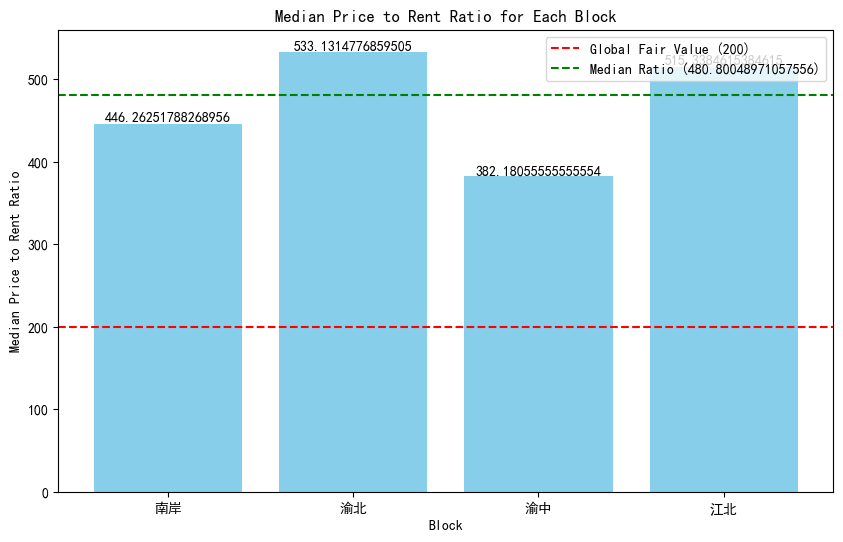

In [276]:
# 设置 Matplotlib 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']   # 设置字体为 SimHei
plt.rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# 建立一个data包含街区和中位数房价租金比
data = {
    'Block': ['南岸', '渝北', '渝中', '江北'],
    'Median_Price_to_Rent_Ratio': [median_ratio_nanan, median_ratio_yubei, median_ratio_yuzhong, median_ratio_jiangbei]}

df = pd.DataFrame(data)

# 计算中位数
median_ratio = df['Median_Price_to_Rent_Ratio'].median()  # 计算中位数

# 绘制柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Block'], df['Median_Price_to_Rent_Ratio'], color='skyblue') 

plt.axhline(y=200, color='red', linestyle='--', label='Global Fair Value (200)')  # 全局合理值线（200）

plt.axhline(y=median_ratio, color='green', linestyle='--', label=f'Median Ratio ({median_ratio})')  # 中位数线

plt.xlabel('Block')  # x轴标签
plt.ylabel('Median Price to Rent Ratio')  # y轴标签
plt.title('Median Price to Rent Ratio for Each Block')  # 图的标题
plt.legend()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# 显示图表
plt.show()

<font face='华文中宋' size=3>
六、用两个model预测price和rent
</font>

<font face='华文中宋' size=2>
1、建立拟合模型
</font>

In [ ]:
# 1、二手房和租房数据集准备

# 添加位置变量（为避免多重共线性，仅设置前三个区块的变量）
df_1['location_1'] = 1  # 南岸记为区块1
df_2['location_1'] = 1
df_1['location_2'] = 0  # 渝北记为区块2
df_2['location_2'] = 0
df_1['location_3'] = 0  # 渝中记为区块3
df_2['location_3'] = 0  
df_3['location_1'] = 0 
df_4['location_1'] = 0
df_3['location_2'] = 1
df_4['location_2'] = 1
df_3['location_3'] = 0 
df_4['location_3'] = 0
df_5['location_1'] = 0 
df_6['location_1'] = 0
df_5['location_2'] = 0
df_6['location_2'] = 0
df_5['location_3'] = 1 
df_6['location_3'] = 1
df_7['location_1'] = 0 
df_8['location_1'] = 0
df_7['location_2'] = 0
df_8['location_2'] = 0
df_7['location_3'] = 0 
df_8['location_3'] = 0

# 合并四个block的二手房和租房数据
df_esf = pd.concat([df_1, df_3, df_5, df_7], ignore_index=True)
df_zf = pd.concat([df_2, df_4, df_6, df_8], ignore_index=True)

# 添加面积变量
df_esf['面积（㎡）'] = df_esf['总价（万元）']*10000/df_esf['单价（元/㎡）']
df_zf['面积（㎡）'] = df_zf['总价（元）']/df_zf['单价（元/㎡）']

# 添加面积*位置交互项
df_esf['面积_location_1'] = df_esf['面积（㎡）'] * df_esf['location_1']
df_esf['面积_location_2'] = df_esf['面积（㎡）'] * df_esf['location_2']
df_esf['面积_location_3'] = df_esf['面积（㎡）'] * df_esf['location_3']
df_zf['面积_location_1'] = df_zf['面积（㎡）'] * df_zf['location_1']
df_zf['面积_location_2'] = df_zf['面积（㎡）'] * df_zf['location_2']
df_zf['面积_location_3'] = df_zf['面积（㎡）'] * df_zf['location_3']

print(df_esf)
print(df_zf)

In [281]:
# 2、检查数据集中的 NaN
print(df_esf.isna().sum())
print(df_zf.isna().sum())

总价（万元）           0
单价（元/㎡）          0
location_1       0
location_2       0
location_3       0
面积（㎡）            0
面积_location_1    0
面积_location_2    0
面积_location_3    0
dtype: int64
总价（元）            0
单价（元/㎡）          0
location_1       0
location_2       0
location_3       0
面积（㎡）            0
面积_location_1    0
面积_location_2    0
面积_location_3    0
dtype: int64


In [283]:
# 清除单价为0的行
df_esf = df_esf.dropna()
df_zf = df_zf.dropna()

In [ ]:
# 3、生成完整数据文件
df_zf.to_excel("租房数据汇总.xlsx",header=True,index=False) 
df_esf.to_excel("二手房数据汇总.xlsx",header=True,index=False) 

In [285]:
# 4、拟合模型
import statsmodels.api as sm

# 模型 1：预测每平方米房价
X1 = df_esf[['面积（㎡）', 'location_1', 'location_2', 'location_3', '面积_location_1', '面积_location_2', '面积_location_3']]  # 自变量
X1 = sm.add_constant(X1)  # 添加常数项
y1 = df_esf['单价（元/㎡）']  # 因变量

model1 = sm.OLS(y1, X1).fit()  # 拟合模型1
print("模型 1 的回归结果：")
print(model1.summary())

# 模型 2：预测每平方米租金
X2 = df_zf[['面积（㎡）', 'location_1', 'location_2', 'location_3', '面积_location_1', '面积_location_2', '面积_location_3']]  # 自变量
X2 = sm.add_constant(X2)  # 添加常数项
y2 = df_zf[['单价（元/㎡）']]  # 因变量

model2 = sm.OLS(y2, X2).fit()  # 拟合模型2
print("\n模型 2 的回归结果：")
print(model2.summary())

模型 1 的回归结果：
                            OLS Regression Results                            
Dep. Variable:                单价（元/㎡）   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     154.6
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          1.83e-206
Time:                        00:29:05   Log-Likelihood:                -48252.
No. Observations:                4786   AIC:                         9.652e+04
Df Residuals:                    4778   BIC:                         9.657e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.501e+04    415.36

<font face='华文中宋' size=2>
2、预测房价和租金
</font>

In [289]:
# 预测函数
def predict_price_rent(m2, location):
    # 构造输入数据
    if location == '南岸':
        input_data = pd.DataFrame({
            'const': [1],  # 常数项
            '面积（㎡）': [m2],
            'location_1': [1],
            'location_2': [0],
            'location_3': [0],
            '面积_location_1': [m2],
            '面积_location_2': [0],
            '面积_location_3': [0],
        })
        
    elif location == '渝北':
        input_data = pd.DataFrame({
            'const': [1],  # 常数项
            '面积（㎡）': [m2],
            'location_1': [0],
            'location_2': [1],
            'location_3': [0],
            '面积_location_1': [0],
            '面积_location_2': [m2],
            '面积_location_3': [0],
        })
    elif location == '渝中':
        input_data = pd.DataFrame({
            'const': [1],  # 常数项
            '面积（㎡）': [m2],
            'location_1': [0],
            'location_2': [0],
            'location_3': [1],
            '面积_location_1': [0],
            '面积_location_2': [0],
            '面积_location_3': [m2],
        })
    elif location == '江北':
        input_data = pd.DataFrame({
            'const': [1],  # 常数项
            '面积（㎡）': [m2],
            'location_1': [0],
            'location_2': [0],
            'location_3': [0],
            '面积_location_1': [0],
            '面积_location_2': [0],
            '面积_location_3': [0],
        })
    
    # 预测房价
    price_pred = model1.predict(input_data)[0]
    
    # 预测租金
    rent_pred = model2.predict(input_data)[0]
    
    return price_pred, rent_pred

# 预测 m2 = 50, location = 南岸
price_50_南岸, rent_50_南岸 = predict_price_rent(50, '南岸')
print(f"\n预测结果（m2 = 50, location = 南岸）：")
print(f"每平方米房价: {price_50_南岸:.2f}")
print(f"每平方米租金: {rent_50_南岸:.2f}")

# 预测 m2 = 50, location = 渝北
price_50_渝北, rent_50_渝北 = predict_price_rent(50, '渝北')
print(f"\n预测结果（m2 = 50, location = 渝北）：")
print(f"每平方米房价: {price_50_渝北:.2f}")
print(f"每平方米租金: {rent_50_渝北:.2f}")

# 预测 m2 = 50, location = 渝中
price_50_渝中, rent_50_渝中 = predict_price_rent(50, '渝中')
print(f"\n预测结果（m2 = 50, location = 渝中）：")
print(f"每平方米房价: {price_50_渝中:.2f}")
print(f"每平方米租金: {rent_50_渝中:.2f}")

# 预测 m2 = 50, location = 江北
price_50_江北, rent_50_江北 = predict_price_rent(50, '江北')
print(f"\n预测结果（m2 = 50, location = 江北）：")
print(f"每平方米房价: {price_50_江北:.2f}")
print(f"每平方米租金: {rent_50_江北:.2f}")

# 预测 m2 = 100, location = 南岸
price_100_南岸, rent_100_南岸 = predict_price_rent(100, '南岸')
print(f"\n预测结果（m2 = 100, location = 南岸）：")
print(f"每平方米房价: {price_100_南岸:.2f}")
print(f"每平方米租金: {rent_100_南岸:.2f}")

# 预测 m2 = 100, location = 渝北
price_100_渝北, rent_100_渝北 = predict_price_rent(100, '渝北')
print(f"\n预测结果（m2 = 100, location = 渝北）：")
print(f"每平方米房价: {price_100_渝北:.2f}")
print(f"每平方米租金: {rent_100_渝北:.2f}")

# 预测 m2 = 100, location = 渝中
price_100_渝中, rent_100_渝中 = predict_price_rent(100, '渝中')
print(f"\n预测结果（m2 = 100, location = 渝中）：")
print(f"每平方米房价: {price_100_渝中:.2f}")
print(f"每平方米租金: {rent_100_渝中:.2f}")

# 预测 m2 = 100, location = 江北
price_100_江北, rent_100_江北 = predict_price_rent(100, '江北')
print(f"\n预测结果（m2 = 100, location = 江北）：")
print(f"每平方米房价: {price_100_江北:.2f}")
print(f"每平方米租金: {rent_100_江北:.2f}")


预测结果（m2 = 50, location = 南岸）：
每平方米房价: 11807.49
每平方米租金: 27.82

预测结果（m2 = 50, location = 渝北）：
每平方米房价: 15243.72
每平方米租金: 80.57

预测结果（m2 = 50, location = 渝中）：
每平方米房价: 11666.50
每平方米租金: 33.02

预测结果（m2 = 50, location = 江北）：
每平方米房价: 15506.64
每平方米租金: 34.41

预测结果（m2 = 100, location = 南岸）：
每平方米房价: 12872.28
每平方米租金: 33.18

预测结果（m2 = 100, location = 渝北）：
每平方米房价: 16278.26
每平方米租金: 59.63

预测结果（m2 = 100, location = 渝中）：
每平方米房价: 14133.00
每平方米租金: 37.34

预测结果（m2 = 100, location = 江北）：
每平方米房价: 16005.63
每平方米租金: 34.70


<font face='华文中宋' size=3>
七、绘制预测图
</font>

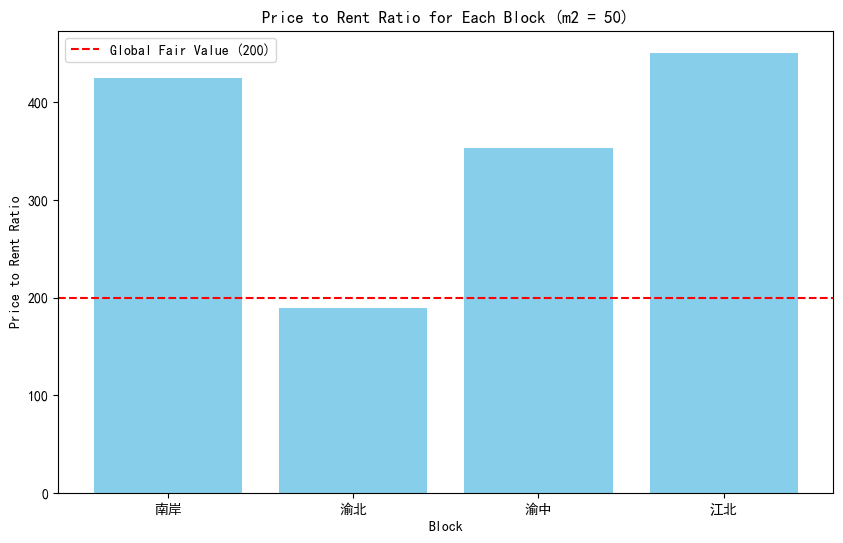

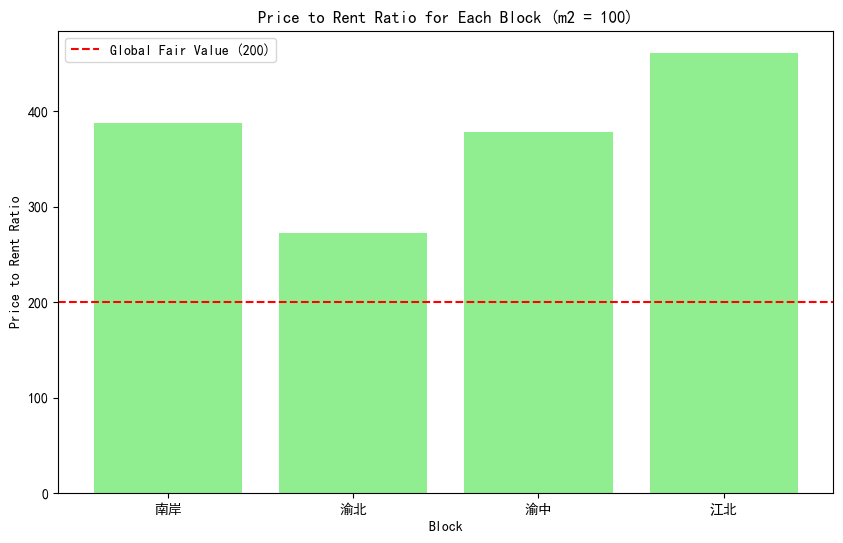

In [303]:
predict_data = {
    'Block': ['南岸', '渝北', '渝中', '江北'],
    'Price_per_m2_50': [price_50_南岸, price_50_渝北, price_50_渝中, price_50_江北],  # m2 = 50 时预测的每平方米房价
    'Rent_per_m2_50': [rent_50_南岸, rent_50_渝北, rent_50_渝中, rent_50_江北],  # m2 = 50 时预测的每平方米租金
    'Price_per_m2_100': [price_100_南岸, price_100_渝北, price_100_渝中, price_100_江北],  # m2 = 100 时预测的每平方米房价
    'Rent_per_m2_100': [rent_100_南岸, rent_100_渝北, rent_100_渝中, rent_100_江北]  # m2 = 100 时预测的每平方米租金
}

predict_df = pd.DataFrame(predict_data)

# 计算房价租金比
predict_df['Price_to_Rent_Ratio_50'] = predict_df['Price_per_m2_50'] / predict_df['Rent_per_m2_50']
predict_df['Price_to_Rent_Ratio_100'] = predict_df['Price_per_m2_100'] / predict_df['Rent_per_m2_100']

# 绘制 Figure B：m2 = 50 时的房价租金比
plt.figure(figsize=(10, 6))
plt.bar(df['Block'], predict_df['Price_to_Rent_Ratio_50'], color='skyblue')
plt.xlabel('Block')
plt.ylabel('Price to Rent Ratio')
plt.title('Price to Rent Ratio for Each Block (m2 = 50)')
plt.axhline(y=200, color='red', linestyle='--', label='Global Fair Value (200)')
plt.legend()
plt.show()

# 绘制 Figure C：m2 = 100 时的房价租金比
plt.figure(figsize=(10, 6))
plt.bar(df['Block'], predict_df['Price_to_Rent_Ratio_100'], color='lightgreen')
plt.xlabel('Block')
plt.ylabel('Price to Rent Ratio')
plt.title('Price to Rent Ratio for Each Block (m2 = 100)')
plt.axhline(y=200, color='red', linestyle='--', label='Global Fair Value (200)')
plt.legend()
plt.show()